Load data

In [29]:
import pandas as pd

data = pd.read_csv("train.csv")

Plot raw data to gain insight

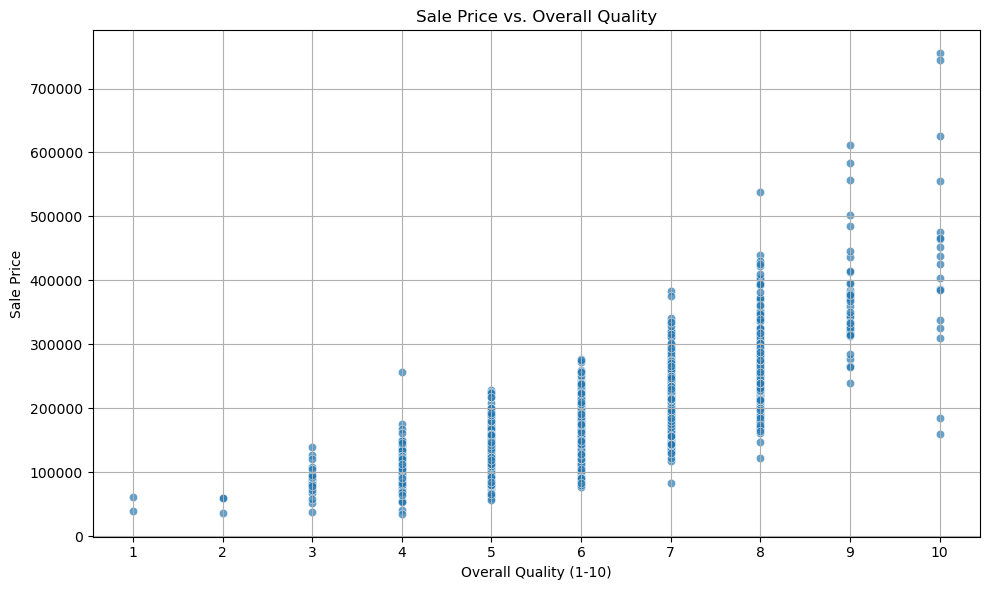

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot overall quality vs sale price
plt.figure(figsize=(10, 6))
sns.scatterplot(x="OverallQual", y="SalePrice", data=data, alpha=0.7)
plt.xlabel("Overall Quality (1-10)")
plt.ylabel("Sale Price")
plt.title("Sale Price vs. Overall Quality")
plt.xticks(range(1, 11))
plt.grid(True)
plt.tight_layout()
plt.show()

Interactive plot

In [31]:
import plotly.express as px

fig_grLiv_salPric = px.scatter(
    data,
    x="GrLivArea",
    y="SalePrice",
    title="Sale Price vs Above Ground Living Area",
    labels={"GrLivArea": "Above Ground Living Area (sq ft)", "SalePrice": "Sale Price"},
    trendline="ols",
)  # Add a trendline
fig_grLiv_salPric.show()

In [32]:
fig_yearBuilt_salPric = px.scatter(
    data,
    x="YearBuilt",
    y="SalePrice",
    title="Sale Price vs Year Built",
    labels={"YearBuilt": "Year Built", "SalePrice": "Sale Price"},
    trendline="ols",
)
fig_yearBuilt_salPric.show()

In [33]:
# Create the interactive box plot using Plotly Express
fig_neighborood_salPric = px.box(
    data,
    x="Neighborhood",
    y="SalePrice",
    title="Sale Price Distribution by Neighborhood",
    labels={
        "Neighborhood": "Neighborhood",
        "SalePrice": "Sale Price",
    },  # Customize labels
    hover_data=["Neighborhood", "SalePrice"],  # Add hover data for interactivity
)


# Show the plot
fig_neighborood_salPric.show()

In [35]:
fig_lotArea_salPric = px.scatter(
    data,
    x="LotArea",
    y="SalePrice",
    title="Sale Price vs Lot Area",
    labels={"LotArea": "Lot Area", "SalePrice": "Sale Price"},
    trendline="ols",
)
fig_lotArea_salPric.show()

Relation between Location Lot Area and sale price

In [39]:
neighborhood_data = (
    data.groupby("Neighborhood")
    .agg(SalePrice=("SalePrice", "mean"), LotArea=("LotArea", "mean"))
    .reset_index()
)

fig_neiborhood_lotArea_salPric = px.scatter( # Changed from px.scatter_mapbox to px.scatter
            neighborhood_data,
            # No actual geographic coordinates, so we'll use a category
            # to represent neighborhoods.  Plotly can still make a useful chart.
            x=range(len(neighborhood_data)),  # Use a simple x-axis based on the number of neighborhoods
            y=[0] * len(neighborhood_data),  # Use a dummy y-axis
            size='LotArea',
            color='SalePrice',
            hover_name='Neighborhood',
            hover_data=['SalePrice', 'LotArea'],
            size_max=50,  # Adjust the maximum bubble size as needed
            title='Neighborhood Sale Price vs. Lot Area',
        )

#  Customize the layout.  We remove the map and axes.
fig_neiborhood_lotArea_salPric.update_layout(
            showlegend=True,
            margin={'l': 0, 'r': 0, 't': 50, 'b': 0}, # Adjust margins
            xaxis={'showticklabels': False, 'showgrid': False, 'zeroline': False}, #remove x axis
            yaxis={'showticklabels': False, 'showgrid': False, 'zeroline': False}, # remove y axis

        )
fig_neiborhood_lotArea_salPric.update_traces(
    marker=dict(sizeref=2 * neighborhood_data["LotArea"].max() / (50**2)),
)
fig_neiborhood_lotArea_salPric.show()

Data no sale price column

In [50]:
X_df = data.iloc[:,:-1]

columns with numeric values

In [51]:
numeric_columns = list(X_df.select_dtypes(include='number').columns)
print(numeric_columns)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [52]:
numeric_df = X_df.select_dtypes(include='number')

In [54]:
numeric_columns_with_missing_vals = numeric_df.columns[numeric_df.isnull().any()].tolist()
print(numeric_columns_with_missing_vals)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
